[IPython Notebook](detach.ipynb) |  [Python Script](detach.py)

Advanced: Detaching from Run Compute
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe2
from phoebe2 import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe2.logger(clevel='INFO')

b = phoebe2.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Now we'll add datasets

In [3]:
b.add_dataset('lc', time=np.linspace(0,6,501))

<ParameterSet: 18 parameters | methods: LC, LC_dep>

Run Compute
----------------

Here we just pass detach=True to any run_compute call.  We'll immediately be returned to the prompt instead of waiting for the results to complete.

In [4]:
b.run_compute(detach=True, model='mymodel')

<Parameter: detached_job=unknown | keys: description, value, server_status, location, status_method, retrieve_method, uniqueid>

If we then try to access the model, we see that there is instead a single parameter that is a placeholder - this parameter stores information on how to check the progress of the run_compute job and how to load the resulting model once it's complete

In [5]:
b['mymodel']

<Parameter: detached_job=unknown | keys: description, value, server_status, location, status_method, retrieve_method, uniqueid>

Re-attaching to a Job
------------------------------

We can check on the job's status

In [6]:
b['mymodel'].status

'unknown'

If we want, we can even save the Bundle and load it later to retrieve the results.  In this case where the job is being run in a different Python thread but on the same machine, you cannot, however, exit Python or restart your machine.  

When detaching and running on a server (coming soon), you will then be able to exit your Python session or even open the Bundle on a different machine.

In [7]:
b.save('test_detach.bundle')

'test_detach.bundle'

In [8]:
b = phoebe2.Bundle.open('test_detach.bundle')

In [9]:
b['mymodel'].status

'unknown'

And at any point we can choose to "re-attach".  If the job isn't yet complete, we'll be in a wait loop until it is.  Once the job is complete, the new model will be loaded and accessible.

In [10]:
b['mymodel'].attach()

<ParameterSet: 3 parameters | qualifiers: flux, detached_job, time>

In [11]:
b['mymodel']

<ParameterSet: 3 parameters | qualifiers: flux, detached_job, time>

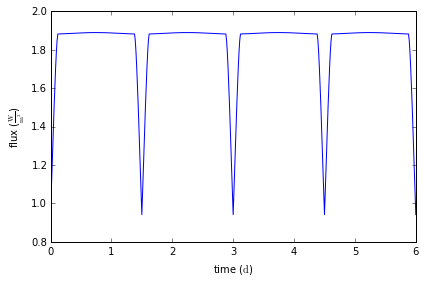

In [12]:
axs, artists = b['mymodel'].plot()